<a href="https://colab.research.google.com/github/dkaratzas/DL2022-23/blob/main/Problems%206%20-%20Pretrained%20CNNs/P6_CNN_PretrainedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2022-23/blob/main/Problems%206%20-%20Pretrained%20CNNs/P6_CNN_PretrainedModels.ipynb)

# CNN Transfer Learning

In this notebook we will learn how to finetune a modern
CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html), which has been pretrained on the [Imagenet dataset](http://www.image-net.org/). The [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module implements lots of popular CNN models such as: AlexNet, VGG, ResNet, DenseNet, GoogLeNet, etc.


*Credit: This notebook has been adapted from the official [PyTorch finetuning tutorial](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).*

The Imagenet dataset has 1000 classes and millions of images. Training a ResNet-50 model on ImageNet-1k with a single GPU takes several days. The key idea of transfer learning is to reuse the knowledge learned in one task to solve a different task. Transfer learning is specially useful when we do not have lots of training data for the new task nad/or when we want to speed up the training of the new model.

For the target task we will use the [hymenoptera_data dataset](https://download.pytorch.org/tutorial/hymenoptera_data.zip), which consists in only **two classes** ('ants' and 'bees') and only around **one hundred training examples** for each class.



<table>
    <tr>
        <td style="text-align:center">bee</td><td style="text-align:center">ant</td>
    </tr>
    <tr>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAACAkGBwoLBAUC/8QANhAAAQMEAQMCBAQFBAMBAAAAAQIDBAUGBxEIABIhEzEJFCJBFTJRYRYjQnGBCjORoSRDUmL/xAAdAQACAwEBAQEBAAAAAAAAAAAGBwMEBQgCAAEJ/8QANhEAAQIFAgQEAwcFAQEAAAAAAQIDAAQFESESMQZBUWEHEyJxFDKBFSNCkaGx4QhSwdHw8TP/2gAMAwEAAhEDEQA/AMTFqYukS3ULW0vt3766VtY4tSgWBjM9SoI+hY0hUxhMiUhKQBvyPfpYVDitx1WlEW25O+RETvIwYrTrcVoa1+Y62P7da9EUtagVGLKqeYFys/zpiz9t79vv025E2RFb4fSY/EOJMbWiVEQ8XGyFBSUklP8Afr27Mt/IvnE/kkZgtcG31UMiVqk4muEMz5NRcRDgbaA9VSjr0zr7+d9A9V4bYlFGdl8AZOefWIplSlpCVRqIwx8Nrm5xrxvjii4o5IVCybKercKoPx48VpfyIU6lSmngsfW0QSk+3g/56TNX+xpuouVV5oKeCSNyLm1gd94MKQqfZaSwFDQT05dLw8DMXw3eMGbeT2B8+3ozWaBlm1W20y3aRILDNypACmkyQj/cDa+5SfvpRBJHW1w7WEFpUrMIulWbEXz2PI/xF2oyxKQps7fp/HSLg55ZbRx3xFc962tBrMUUaKmZLZkoVt1jYBU2QPqICt66weOZxyXUlmRuFKIH0ielSmpOpzPtBk8acpWBn/ivbtxxJdPqbT9LaktvJUlfavsB8j7/AHBB8EbHWHLcZIMsW3MLb3+m8a7lBUhWc3iQcOrYsLFOJ6NiTElATbVgUkOsU9lX+2ylTq3C02T5UE9/aD5OgNknpsSU2mcl/NaV6Vi4J6np7bQKD7twoIynEEs1QJ9Th1GjV+clUN4HQ39uq8tIrbZW1NKveL6nNSwtsbRyR4NNp9KbSlltIWPGyPboHfmnXj6jAY0wEi5iNXLXW2W1jv3obPWtSqfqINovMJ5QM9115Dylo37n/jppUenkZjTS0DiKudaCz6nhRPnouQu2IkVTudotjEl62vadX1dUVaoat9riU93af/0P06FeK6LNTbV5U5H/AGImaYQnDgxBicensESeRuPrtbRSWXY8sSklD/YPVHsoJ2B3dYc67PsU1Tb97C1/pGI5IpU7pTtG3i1+b+M7ZtKifx/IZVQVxG0h9xaVJUkAD6knpJy4l11EPkW/YwXFbjbGlW0NQxHkLFd8NWRX4kJD9Lkx0yYUxsBbQToa+oeNa/fpgSvE8iq2MiKv2a8RqScGPq83uTfFjC2PaTUMy3fYVKRKeTEgJqLyNyHT5CG06JUfvoA9AfiNU3ZuUW1KI8xyxsB069gOsE1Ep+hVzgQBll3lfLi6w9x8x69Npc/a5DMZoMRyVDfqewGyDvwPPXE8iOKJpbrcqCrkbC8Fs3MNN2JIt3iJWtf/ACfw/dNUaekJk0eO4C7QZckNhtxY7yqMSPKRvyN+/W5wn4h8Q0gJps67oCDhKsG3btGdMSUqpXmKA9XMRdd+Zm53XouBcWGsd0SdQmYv/ltPyVKW6nY7vT7P6wnet+Njz4Ow+ZLiSuVVCy0Ck6bpIyL22Pv1iu7KSbLYUFDVf2x/uOeLViY7Dr3foJ+xPg9OCR9SrQl306U3vA53fXFJUsFej+3TNo1OuBHqVetA/VWd8zIUe/ej+v79MaTY0Jjel3QFXiSW7a913RTq1Ubdta5K/Taaz8zUZEGC7Ibp7X/2+pCSG0/uogdV5yZYYWlLywkq2BIF/a+8ETStQ9MQSoPgjSTsf9dazDVt4x6g6LYj1Y8s3IF/3pSaDjKi1SuXgp31YzURP1oIP5yf6Ujx5PVyozEs0wTNkaDjPPt3gXUtWoFO8NXvCy+Q5tNnDOe7hu23r0mJQigtU6M64l9QAPYpQT2q9zskj9t9Ib4KVlqgmckGQtofMFWuPb+AY2F1DW0WphWkna0MC4b3R8V7j9jWDhuoZNiWVx2aeK36rUqe7Om0qEB3raYSn60lQGkg7CSr3146VvijxJwwXHHpVpz4o/gSQlJUcAm4262tBRw4JwpDStOgfiN7gfT/ADGhHiBT8Nc4L5xVeV4wqpkiba4eejuVOIDHaWlIR3Ooc9nfPsB9zvpZeHztQmZp6XqIsUjYbW5C/MQU1KYaS2ky6tQPOHl25IkWFe7FLpdOjw6A8R5CAlPjwAAP8dFVPqs1IVLydNmzFKYlm32NV/UIjuXrCxjVsp21Xrso1CqVWmtllHzP1KSn9vsP06h42oFOnZ9t55pKsG9/5ivIBaWym5xFhR6tNx9cNOti0KHBjWmWO0vsjf1K8aGvHgfr1LT3pmRnkSsszaXI+YcoldQh1oqWfV0jlz5otSdZUGO2/pz1fvryejfg2fTOOEjlCxn5ZTabGJ98NalRLZ5eYZy/lvEFwXZhtioyYsWoTaI7Io66qGz6KHHVJLKlJVvSVH82vv0ReLFaXJ8PPKklpLqNJUnUNWm+cb7Zt0jzQJTzpkNrwDDG/jkcPuNV22VK5t4GpNesvMVar9MptXtGlwEfhlYQ62pBkx47SO5qTtKVrIJSsA/SD5Ij/Tv4ymoaaZNm2Fm52TbNrnl0HfEEFapq5Zy6MjG0ER8DOfULT4P5ExPRrXstjIGQBWIqRWmi0JBcbXHbMpXaV+kjR+nRPg+NnpYeN/FE0/xv9nyzg8oBAJ3CRa5t36d405FxhtlLrl9ac2+uLQMPH7/TQ3xV7lyHb/LLPNHxY5Tg6aQbZZE1uotBHcJPe8E9rR+yNd3g76cHFv8AVJKSkyJSSb9QFyV8+w0n9f0ipKUhyYsoi4P0tFG8KsJYh4P5cv8ArWQshLrF2Ip9RYpjhaaRGlMIQ6qNLjJ8qcQsoTsEgoWCkjwCWDVeK01iVYmflTj07kFQ2V/1oxH5Yyzymyc+0ad+WmdeJvGPBcfN9x29QbicRCbcZW6A468soH5fckkn2Gt9B664XVplKUjW4s2Gbf8AlovIYbaHmv2AEZ76V/qCsPzJcin3dw6k3BTG1FpiXEup6AmayVKJTJYQhX06KRpGjoe46Gp3+mqozE2Z+dmUOBWS3ZSbdgsHI63GY0U8cy7bGhtshfW4II7giCbwh8e/FtDm0K3rHxzZ+GrTeqKFTaZQKeppLEcnSlKdWpTr7g33Ek+fOgOsOf4A4nkXSpttCWANkc+lzk/mYs0ziSmO2Sq4Wev8QdXKf479m4aomMsg4wvTBucLJmRFRqnSotWdbuSk1BHcorciKQAmIpAbAcUd95Ke32PXmU4TrNWIQlJbWP7k+kj369hyzBRPPS8kyXnNj0Iz7Rmm5XfHX5gcksjmv2PNmY7SFFijwqY6448wT4Hb2janDsew/sOnHw9/TzKJImKu8p1fP8KQOg7QvJrjh9XolkhA5cz+ca7/AIWXxhuGt8cZsJYpuTOKa5nxmkNt1Wk1FLrlWmVAJJeISQSs77jsHQA2dAdAPETk/Q0Oidl1JYQTZQHptf02Vttb6wVyaWZwpW24CogXGL39ozSckcCV6s5Hte0rgoFdoKHJkVD7XaEOhh1xKVFG9jeide/S+4SrqpBpxxdgoA4PaAubT8Q4EpOLw7vE924w4iceqtxVq0+6blwrHuiRbzP4jSVy5CpL8shtDXyyFFakuKSj1+0eSk7+odKjxCfrNVqbrEgnzHSnWtKSLelI1EXNhjlfPLpBfTGJWWltcwbC9gb79L94huGciQLBu0X/AHJddtTrFtatyC7AnRO75eK00SqfKkLIajoaQVDWioqUdlPaNr+ku/BS6fhUqM26QEoAuTnItuST22/SamyLjyluPizSed7CBos7lHjDOnJLKmX+OL1Jl4/auJiETE3CaTMUjvSGipGh63a4pJ1pZQrW9Hol414Or1Kk236s0pp1Y1f3WBOxscEW+kVW3pdcyX2yFJFk/Uf46RbvKSf8UfIONJWaLiujFOLeNlPW9HvJ+zZMiRc34AhpSlFL0hAbSlfb6KvS/mJ7+78vkFPhfw1wpNvGZcD0xOkAI83SloK7hJJNtxqNjzEXqlVphtFmbIQNzuf9fvaM6d88wsc59mV24p+OpOP7fhMs25YkWjvBp+EklAXMqD5QsElDiQlISdua2Pp312FSvDeZpWmW80LUr1u32NrkJQLi5uDcm2PeBb4/4oKeti9h163P/ZiL0O465f1h3Lj7POTr2qttVCW5Jp1IfSJBpjqlFaXXFjSUuAaUWm/pAH335hqxElNonKIwkKQMqvbVixAGcHqc84YEnweJ6XDc6vSo7WG389uUBDljCt0YYr0Km3AI86kz44m0ipx9mPU429d6D7hQPhSD5SfB+xLX4V4zlq1Ll6XuFIOlaTulXQ9uhGCISfGHDM3SJoy0z7g8lDkR/qPBh/F1/ZyyjZeJcWUVyu37W5yIcBhKuxIV5KnHF+yGkJClqWfCUpJ6t8U8RSNGpj1Uqa9LDYJUd/YAcyTgDrGJTpB2YeS0yLqURa3f/vpDO4HA+DJ5YJ4uXNWL2z/R6Ky1/EdRxuw22uA+uKHVIdemEMsNsrKkOOuKSBr3SdpHPtL8VpudoArlHaQw68T5SXzYFIVYkacnUMpxbuRYw6Jqg6mxKzSyryzZRQL2J636bGNJnwqPhUcTuMd/3Byls29KJnO4oiZLFCXMuWl1RdrtqZSh5v0IKltql95UkvKIU2g9gAJKzizvirxHO08M1qXQw4DcpSSdQ3SrqBflscHtFaS4VlWnStlesdbbHmD3hxNM45cNZ2Qn+V1icc7Dk8hE0KpQZ9Yo1OZizKoVhKlR3fKGC+v0UNh90d4Srt7wgqBpOcbfG0osOEqaGSFG4BA77WvyxztF5FEQ1MAmySdj/wCQvnk3hN/lXdsK4v4ZrGNLrqrCGoX4k0YaV7P0ltWvdOtnQ+wPSI4arUwsuCt3bWCLXxcHG0ZFQlWysKlMgwPND4ic0KLAbwZR0G3bbShFJqFat1xyq1F6IlWyg6BWwHFBtxTuyo9gGwCR1XpLzip6ZFKQXX3znYISkG9sfML2JAtsOQjWakWmmUuTRwDgWx/J/SPp3ZwUtfC2NnrvfrtSqts25ITOuW3buozbiUvsyUJbeXFUpaXUgrbc9J5CgD2qP6Ci3UZ2n1AvMrKKi3cD0AAjmE3uQbddxz5R7rFLU7LJUMsnJzjtjEGZQLSta5bLoF31yp42vuya++xBqNsS6XDaZqK0glrv9FCdqR9RSdbR/TrqrP8AifXi4mZfmivNlJKQRboU2tYxBKUZgIKfLx23iY1zjZi7DuP8lm8uQdz0DDtQo8uXHsu4rji/h1LilH1hL7+nnUJ0oBTrhCQTvx10TQOEuFKrIqrki35LyQSEJJvrA2SnY3OEgDeMV6cn2FiWX6kqO5GLHkT2jNHlb4VtvUiDamReLeS7Jynjqqon3jUPlJkWXHtx6G6w48w6uM4exJZWAnu8Ba+0DawemIKpUfsuXmn0qWpbHqB9K0WBwoHNxcHYE7Ra4eSwzMOIcXazidNsg55ciMW+sLKuOm2yc9Xaq751YauMJjgwIBLjzkxKdF5ccpProcSAfoKVBR7UpOwk3KIVu8PoZaAAGqylYGkn5b4KSnvfAv3hwtTrTdXMwsk30+lJzcCwOxBvgdR9YsLklbcvLWIafAah0in1WjSXKhBK5oUtbHZ2aZR7qCwhS1AhJBGwD5BEvDRkUKrr81epLwAwPSTe++1xsOu14/fGWUNak0Oy7GkNZJtke459+m9oXFx/yPlHA3ITHF54wTHYyNCqzUOLFkgmPP8AmD6C4r3aQVMvJdKCUneldyTsDrpLimgU+tUh2Un0hbChci1/l9QNjzBGx9o5QkH5mQmQpGFp/wBcuxEbtcXfCaw3i7AOZbLpLeQLdtjJEymVe9bfiTG5qPSbUh16kioPJ+ZcgKd7/wAxDitjuUr7oitUYPvy9YnFLU9LJ0tlJCUgG2SkfiwADgDBAxDDptScZZXKMgBK73vki4sbH2653zBg2XxkxZgTH8mh4FsSPhqmMxlCNDokpbafRL3rONlJ7kqUsl3ayO8950pO9gQ4yX54XMzH/wBldVFR2A0k+3+I1aC15VkJ+Ufl7wUdhz7exhbEORXKRW6nErEUynmoKUlUF5QCkJcQog+W1BXjewD4J6Vb1DLA+DfQVB0bXsAeivpvBcJpKh5qTbT+Z9oF+qV3IOZrmxDZDrpui2qW27V5C2VFmUA06GkoJGiDruJA9+39+kPXKfPLeZM4rzikkqTc2tfkd4+UltJSlpOi+x6wxu85T9m2rZ1WxbaDNcqshJafZZ/nS0pSkKSsp91DfgknxsddJV1c4xKyj/D8olWNJCfmSLYPcf3c4qUllhSnW5xy1si+xzkdvaKNy7iTGeUrJuW1czmn2xflaYbrtNbCHgpFSSpRS8txI9NW1fyyhe06142B1LMzshJBT1TSlubcSSLg5PdWbXOMGK7skqZAaaJU0D2wMWsP1gS+P1StS2ZVdsJVoW7VqdIWhgwCwAkOt608knZC972rYO9+3WLwuzLzVUVQGSHFLN1ax1GrYDAF7Dp1iCZV5Ut8YsWANgAeht9b9ecSDlLxywRek608h5a4y41yBVH2RQmJtVpCKiuNFUSUxx3dw7CSo+R5J9+m3xDKucNybbcgi6CsDUi4seRIHMWtc+3OMqmzyp0q1Ktg4Ntuf6QqfkdiL4cdYlW1jW66viPjNl6NDkQJ9PsyqqtWozKcXkrAkCAppLjClNtuKD4UCUJV7oGoeDeMKy5R0vThUp5tSmnCpvWHNJ9KiCCL2O4teJ6lTUh/7sXbICk5tpvvY4O8Kkuvh7iqVx+z9yht6zruse2Is7+HrAZpkmRKk1K34rzgm1WQ8orWt2c8FLbeUVD0mWSkkLBBdUa5NAMsagpZUlRuBpClYSk2sAEJ3GPUSDBBwlobqWiYulNlJNidViL3F7kk4t2taBIta5bmrNlUSt0W1LJsJmIltqdMuNwRTrZK+2GNuLQsdjgCik7WT+p6EJ2mSrM44h55b6iSUoaGr2Gs+kWNxi+3sI6Seq7zskG22UstkZU56DfrpF1Z3yRvm8HZgrhMznjImMOYmKrdxpV6Vj64YlRrlNtxp1iDUkRn23wmnR3AtTmkOq7m+5RbXHVskOJ63eH6/U5SVekngshViA5lzJsciwNrcvwntHK/GtGk1zaW2tPp2Un5TzA9j72BHeGs/Et5tchMOZy4z2TgW1bsquLPRj3/AHTVGWO6DclNlKUw1Hbd8pW202HXVaOw4W9/l6hqzst5Tgfe0G33Yucne9hy/CL878xElBpoU2pak3N89oOi8+Tdo25a+O6/Ll+tYVd9SO65He7XkLCe4BJKVdoI2Ce0/fWvfrldHFc3OVANSwDgT6ikkjAOcwWLk5dqXUp06b4BtffaCeol4ryHZrNwU1yJEiSktKTodyW0AAJQknydAAdPatLen5L7hYSTvAfKIDa/UI8WEr/4wWZnTKWHLmfqtJynbcgrZ+ZjuH8TjOsocS4w6jSF9yFo2zvaDrYHSvqT1Fk3VrmgQkElJ31flkHoCLEbEwQNMvuJSAQTbI6fnFPU3kzdeILyk3tJohaxT85IjSmJD/YqmLUkFDaUL0olXchWkg/r7dI2h+NU/LTzswyNaCqwbyCR1GLCwyb2jXnOHkKKUBNwRckciOsDxyZ+IeMg2tbeVbftWsWZRabGdgLkTEKU1IbU/tzTrYKUKAG092vcnxrrd4zrs/xHWZZSG7eRfF7gqJCgkjobZ/KKTVN8tlaZZQJVv25fmIAbGXM8UyQ9kC3mptVoVPUoz5QYUtLKSra/UWkdo0nzskdNfgeSfp1QmJ+ZOmbmFE+wPIc8n9oxanSVNy7cuvKEwzS8/iC2ZlXEVXtXHMa5q81WmTCMksKiPpjKR5DBSrvQrX/tBGv6fPkTcUeN0xK6qW0kqWfmV/gc7nmeXKJpLh5AUJi2RsN8/taACuzGvA/krUqZUK/h6wHMuW3TmW7lfW04EuJjElhqQjuCXwfzErBJ9iSCR1Ro/HtTl5ZptJUwldzg2BJwbc7kcxY/XMEoQlwqSohWwNxfbP6dNoGesfFr4J2xGvLFdxXFXoEeHGkUmbS2aG4IjiEAtmMyWh2aI8J7dAftrp0Unw24ofYS803qbcsQdQzfmQT9YCJrienocyr1pO9juDyMZqaFJozWUmFU2JT5mP7g75dMn3VU1FLsdbigjuYc2S42B6ZACvI2D9SeugJtt0U8+YSl5mwUlpAuCAL+ocjvc29t4klauHppKj6kuZCnF3z7HmNrZjWJ8Ka6Lyn4aqkO2rnpFzmm3R+HFdKhqiRoSlMNvLbSvu0vt/lnuAT2k9uj46594rZnWptC5VtYCrGylDUR1P8AaOvM7xeqUxLOq+8Ukm1jYWGOUNDzRcVmW3QG5CrOpamlNzGJEV19IbjKfKVvKjII02ha0qdKPbvWsjQIATfiRxu0NKg3ZWUlPP6f9zi9RJJ0JVm6Tn3tEc4k2JgzO3G+qYXv+2KbVwRJajyXkgSKV3POKjuMvD6m3GtpKVJIJHg7BIO34XSMrOShQkJS8sZVbbsef0jFrLiwQ4q6kA4EEVjPjtVMd4+t3GMXJS7/AKxr0lyEMJgteoB4+nuWU7/v1qVbgyfbeRL058OoV8w2t+UfSVYZUhSn0lFtud4gtpcJeNnGqzLDsvHTNGnX3Wq1DkzLrvaZLrNVqkBwFbyjJUoKCiS32tgtoAA9tAmr4nS1LqBblH3Qy44UgK02FrAYAsB/k7mJuG2JlhKnUpKgAb+/c84IfO3De1aHaNs0CBU502jvzkVOLPciNlCprTiHS2spHY2XUoUgkDygr+/ulONv6fnKTNtvUxaltrChqIsEki2bHvqF+YG9oIZDikzAPmpGra1+Rx+mIE648N4uyjaGS0W/lS1Lutqt0dNPlUWn1NJajSEIcSrtSgkKC3FBa+7yFNo1rR3Re4QlqdMNzkq/oQzmxKgonmTe4OR0FrntFxLjplwyUdbEbZ22hXVOVRuEWJrox87SKTV3XnJdTSwgoVFlyHW+1SXW1pVvylIAKSCn6fv1bnqKjiWotVNM7ZxsJSU9gd0nke+/eK0lNKbSG3k37wvTDvKqh49ep1v1pit2Zc7OywzKjKabkJJ89iSACPOtD26aHEHhvNKbcmmAF6s6hYke8Xp4ttLHwygpIi1GLf5C3tb993Lg/G9Yq711K+UFSSAhhO1aLqjsEpSCVHQJOjrqnw9wkqZfZM5cttcgN7ZsDtc7dBzgTqdSW0FmX+Zf6dz+8Zn+WWCKxx0zzemKrgu+m3vcEJbb86fFjLZbW86n1FJCXPq8d3uev6LeG3Ff2xSG5wS5YTlIQSCQE+kG4xm0JniCmfCzSmfMC7WNxfnmLIsHK9wZgtqyMD5Btu07wXBTHpNs3FP9VFQt+KhRUhhK2yEvoSSUt+tsISpSfqT2hIpxRQm6VMPcQSTq0EglxsWKHDa17HKTzOm1yL73uacLTT08yimOoSUg4Vayh2uDkRrV+EHCp2LMCXDYaLWlU2FTrllfOPqfLi6zPd7HFzthKW22wFNspQjegz5JO+ua+MuL3Zx34wOCziU2FiNITgDJNyNyTbeDBmlIaWpi19B36k5hgTuF77zddt4VatTIQsNiURFcV2lySAkaKkp/K2n2H3OvP7pr7CnXluzRUCL+k2BP/gjZM0gAM2sOcXPxZotcsu8Lrsz+HVu2H9C26k0Alt59WwvYGiPyp0r28/t0R+GdafokqtqfQVlxRIAGcwP8Q0xD7gVLGwHP/UHnbmPo9EuKNUGKtJnhzTqV9qdRvPt+514305abQ0NzBnWlK9Vieie3/sDj04SkNKA5/WFZ8Tuc3G74kcd25Ztj3pb9MtmHTpU964UCK3PcX3qfDbiVlLjLSm0JKu4BRUDoAeRjinhSTS+hirBPmo9XpVc45nn7DeCCk1p/SXpO4ScZFhnpFo85/iKRcMXrg3F1qUqucgJapQrcsWq5GciQYfa4236vY4vb5WNhtXs2e7YJAI5Wn599wpXNILKQClOxUb7EAE7c+8XafLAODS0rJyeQ+pxmEZWpxZ4/Y5vzNWdrOm5NsSRWa5LqVJoP4kW/kVSXC4Y/pNKCO1K1rA3sga2d9BPHnGlbq6WqWWUlKQACUgmwxlRF9vpFr7KYlUrdDts8jb9IJS37Cxw8abVr9nSKlcDMlmQ6iW8XChrW9aP7/wDY6XfDsqpmfS2lOkJOcYNukWky2hhS9Vyocz1gi7LwFx3zfl6zb4qNGotRh0d4kx5TafLvskDY0pJBHn3+3XQEnxS688uSfaLaLApVyUOh7gwON0pTKEvpcuTunoYY7KtAU24KdbllWXBtizG3U6LQDTSVq/QDXv1lVNue+KShlBS1fJ2H/GNJkNFJKsqjHJ/qKuM2AsX8k7PqmIHLkqOa69Acql5U5l1UliOwhIS0+UefTJ0RoeCEk/bfXUng5xG6htyTdIDDdgCSB61Z0g88ZPT6wEcScOl1xL6ASpW47DH0hZOJs08bcFWTiyu2XxqpWZ85NNmTctdyBJkLpdMkeuShql0yO8hLnY2lJMh5XkqI7PG+t6pUqsT83MtzsyESpw2hCQSU2tdxRHM/hF7dYmSluVYbMui6+ZJIF+wEaJcEfEehUesW7bWU4dsUjHN0xm2radtuhNRI8aoL2ox3Q35AcB7go/1JIJ89c01jhV1TSyhN/KvqTgWG1xzwd4MWHwVA3yq1veH3YWq8Gy7YmV0TIlRpzsZyW8iTKS20ygpJCiSd9h7dbH69L6nVIySigDUk9SMd40H2PNN9jF7YkVUrqo0OrPri0VEqF8y20ygLJB8hP9gP89MLg6mtVFaniv1IGw9oH6xOFkJb04Jic4+Tc79ceZqkeVDo6XCgLWrQI39h1r0h+cZU4icH3ZwIzZtlp3SWj6o5eGI+fHJ2iWPa3HuTmq8YeDmVJhfgjCm22/llL2porSkLUgknaSojrozi7wfobzztWRLAzJubknfra9r/AEgFk+J5xpkSoX930sP3teNXGEuTfH/HeHrXRNfoFPBaR6pQlKFOqUBsrUkbP/PXKsnJNS763A0PMO+CTiC9+bfcl0tazo6coh3JTlhx1tK3m7ymvPpp8aOuZHj05rvMuZr+UhY+yCSCT+3VFcpPVWZRKyKQVE2N8ADnG1JMNsILkwcAe8Kexly/urKlz9kic/HqNTmISpSjoJClAD/AGtDon4i8PU01PmnOnMeEVxLw0CNXWHsXTMC4qsC5a44i+KrKU292R060lRCgdfqN+/SY4rnJpp+XmUm7QudI5n+IIaVJN6FIV83UxcfPzJs6jcdaAuDOetp+t1aAlUxh7036ekLBKgR5B+3+etLiqsvzcu2zb5yD3xEbMmEXUncQgPl3xfdxrnC1uUlz1S4r5x5dNKFFr9Sn90kQlq0GVqWQQhAPj7Dz0VTcvNfYKadLrusKC0kb3HzDuecadDrTLcwVvDFrQmen8Df4lyXmDHVPuSZSJ7NO/HrQQhAcRVo5e/mIWfcKbSdePPkHpxz3jA5JSklNOthQWrQ6f7TbBHYnOekCL1MVMrmGWFWUhOpI65zGk3ht8PjAUjD9k09wJvL8N9GUTLUVFh78yTvexpWyNaI9uqdfmW51Di2ndK17kAG1+gOLGB+QDyFJStOoJPO/7xSvNCyLUh3CJtIrdYpuQ6GYVGgtIecahTGUL0hptgrKSjbiiT5Pdskk9JL7NTLsKlnHPONzclIBtbGRzHWDd18uOeagaNha5IJhjXHTlrecW2IeNrbo8KTd0LsiVCqLWVBoJ0FIbSfv4A37dBfCdaqdMW6JcZcO/YY/WNyoU+VmEpLpvpGw6w76zqvQLqthuqvPuM1f0/ScipH1h3t9tf8Ae/06eb/EK6lL3T8w3HQwFN01MsrO3WOM9AQ8p5Cml+moEEE+PPXe7xGnIhLwaOLKtd99O0216pXnDBjqSUtlZ7VaP3346TPFsrKSKVTLSPUq8blMfcWQ2o4hhlXtik1K32aXcFQTIaQ0AphxYKd6/v1zXJ1p5qaLrCbG+/OGtqSWw2o8ooTFdqzJebbMsOyXIKavPqLMeH6zyW2kL79grWfASBsn+3TE4ingqkOTk3fSkG/M9P3gXNNeVMJQxkk4jerw8yBamRcXqprMyPckq3FJpin9gokSWvpcKD7FIUCPH6dI6QcbU2UrTcpAt353gvVfZJ7flFJfGyw/fL3Bu98v4tEOpVWhxkVSoRUu6S3HbIUtTf27kjZ/fWuiul8OSb07LPP/ACKUASORVgfra8eBUHG0LAHKKI4s8/eGWdfhd3kzmfI9kUhyNakin1Sn1KShMlqQGCPpbV9RUT7Ee5PjqhUKRUKZNLo7jai4F/d2BN8+kj/sc48qVLvoMyhY0WznbEAN8LvibXci4pxTmzJlcmVSpwnnHbflxSfWMJW0Jbe0dqBbKQd++h9x0c8WU+WcW80GrNEi43sob499oEqPMPJS24VesbEf2nkevtDm4nHCo4MmXRc+P7wj0i33W/m51DeI7UlZ7itIP5fcnx/x0ta7JIblC80uxTuL5tBXIFZe0qF0mBcsO3LErd71G7L6pUXIVeqVZDMFGwoU4JJ7VlP6D9f36zKHWpdLBaUNSlYv0jSqNOd8242EHvQrUsuj3G1IRS6HTXlqIS4ygBSyPuerLs5L2sspHS0eGmHAraLk49Scg1bPd41AToUmxoYZjR206AWSnZ3+qgDrf7jqjwC3NGpvTJUPLsAB1iSveX5SW+cf/9k="></td>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAABggFBwQJAQMKAgD/xAA5EAABAwMDAgQEAwYGAwAAAAABAgMEBQYRAAcSITEIE0FhFCJRcRUygQkXJJGxwRYjQlJyoRgz4f/EAB0BAAIDAQEBAQEAAAAAAAAAAAQFAwYHAggAAQn/xAA2EQABAwMDAgMHAwMEAwAAAAABAAIDBBEhBRIxBkETUWEHIjJxgZHwQqGxCCNSFBXB0RYlYv/aAAwDAQACEQMRAD8A9BFuXC2pSUh1P3z/AG1/JLp3UG4BTF5yrWj15haEnmM/QHWr6fMx4whJ32XL1WSoKHmZ/XThj8XSx7lCSZYUknPXP89DyNBQzuUNzJSSFHl1OlFQwDKheEMuyeLwXzzg9idK3XFihgLFTaZCHigpXlJ+vprqZ27IR8TfNZK/yYOSc9/bUD/dRwQ5Uo4PMA8h/XSaoz7xUuxAtXgtuRHBgYxnSuoYA0ldjASh3pbLT8mY4W8hROcDtqiTZvdL523S4v2czHnOOrQAlSjkY1UGUm2UuBSp0fdPPS7zcTgtP8sfTVk0+pcHWCuVuQrDgbjiOjDzhKx1PXvrQ9O1/YPf5S+Y2wAptrdKGDlTxCvc9tWuLqcHulUsoPdZ/wC8iC6BxdSr9e+mLdcDviQ8ko4CiZF9xVKIEhCSe/XXMmqNKH8fssRy74ahkPpJPv30PJWMPJXzpc2C6WL2THOS7yaPpntpTJWBmRwiY5r8owhXvDlt4+IbGO4PfUj9UY4XTRjrhYFQvGIgjD7fQd9KajUYhzwiBJhV7U7ybfSpLLvLunPbVX1LVg7hc5vhV3U3RKQpPRWT6emqxU1lxYKGVp7qqK7SY6QpRKlH2Ok05PKEdGCUI0m8UNM8kr+b6/TTyihDcqyvBAwpJ++WQAku4P308hzyk87iTZDc2+/LUrypagR9DnUvh5xe6SS3uoVe6c2KSRK5gdvm66KiMzM3v90M4WUS9vW42vLz6kpH10Wyuf3Qz8G9l2Q97FziAy+sAeue320WNQ/SFzDE95uERNbrkJ4h1xSu566imqCW3TaKjcBdTVP3XcQvJeUhJ75Oq1U1JYbhNY4njJ4XNW3aabSpXnnj6/NpVWaqA27iui25uEOQt24r8ryhLGc9QFf01S6zqFgdbcFyWkK5aJdTE1CAXEk4zn01LT6gJCM3XzZL8r6rUhgNqcbWCcemjahzQ291y5w7LWrC3SS211kgD79NWuKnyrHIMXXRL3Zb6fxOFH300j28JJUjKiV7nF7Kg8CO3U6KjZu4Sp8Ryo5d+Ovr8tLi1Ensn10SxgB95CeGSpKEzPrzgSvmlokfbU0sjQNvCNp9KMhu5W5RrQSxFCk8uZ6dM6UzV7APdVkpNJaBlYlVhz4Y/hkOEj1OcjSqSrkcRuwE4bQsAtZBEit16IopeCk+gOO+u3U5flCzU4afRBN23nUG2k+ZIWAQSQD3Gqbq9G5zwzsq9Wu2g2QZQ71lPSm3G31Die/11X6/QmBhDgq82tN8JtbL3FfajIR56lD3PfWfmSoonkR5b5Jux4LbqwJe5ThZUnzOn/LOuv8AySqdgNC4c4ALU4JdSBKfNWkf9DXoNsjQMFWhzxwVhlVbecIb8456DodFxlv6UvlBc6wR7bFr1eYoOTluoR3440VEDzewX5HQbjlXhRbVYZLaS2tZOOpGpJq4N+Eo2HTAOyva07dcdkxY7DKlPOLQ2hIH5lE4A/mdKmTySvs3vj7pkyna3KWPfLxPVO59tN6LW8HNOrO6m8FuFqK78FHz5xD4ZmfhwGTIcYUpIOQnllRRy4nPpHpb2HupXx6hrsjYqcDcb/tc8Wv3XElaNpEeSkb8Nfi8v6DV6lt9vbG3ftauTnRHeTVaHIck0+QsK/jHELb5paSSB5iOWFKSkpwcj0s/Qen6qn2Rsikj9C0/wbhLo6l17F30TSWtuBeVfptUn1qoU2tV63B8DcSqRLVKT5ZHJqcuKkZ8ooUjzCyVqbUTkKwceVutejoKXUTT0pDA74QfhJ8g7i/z5OEVKTa5KwqlVZNdpzdRDkZ2OsApcjuh1p5JAKVtrTkKQoHII76xbqLTTA8CRu1wJBB5BHmqxqLtwKwbfju8+OSgZ7apmoyCyqgaTgK/7aU6hKElSx9tZxqoBym0HKN3EPFHmFSiMZAzpAxzb2CLMVxcoMRss8495rjRCcjPTA1vEGn2HvOVvdFuKLoG2sWGgBcQKUOx46ZxytZ7rcogQNAyjM2nRbbt6r3NWipimQ2uYQkfPJcJAS22PVRJAA1ZdB0h9fLtGGjn5eaJBaBdUhfW5tw+H+XbV17z2/CGy1XdRFeq9LhL82z5KyPLRP6nzWF5CfOGOKhjHUA2vTuk6LW3yUun+5O3LA44lA5t/i7uBkEKE1F8cJm9z7rhbfbQTr2tWt0B+5awwmn2aoyUeXUanIQRGW2T0U2jPnLV1SlCCVdOmh+gfZ7VV2rtpy23hOBfcZG05+vb5oZ1TYXJWmH9mbYEyJv9Or9r1W6KDe8VuoR6jDlSPKpVMrLDjvxkyU1081txtSUobzxbfUlfbAHsD2nVf/qJIKgEnFrfqFxjg8AKJm6NwdFh37D1P5ytzlR8cW018M1ilbV2xVPEDc1vwnJNeqcJDTNvWwllHJap9cfSWG1DgT5bIdXkABPrrzA7oKZhbVVJFOHH3W/rN+LN+L6usERLVtcc5P534COnLIsp6DTNyaNakS3rgq1LZkKJZS1IZbeAkeU4U46hayfvk+uqpPSCnfJExxcwOJzm/ryRnvZB1FQPiv2STV3Z2RbkuruWS1TYFKlSVzXaNISUxEvrOVuRloBVG55JU2ErbKjzCUnPIXqTXmVkDYdTBdsFmvbbeB2DgcPA7XLXWxe1lXp5w7kIaobdMaq1Nodfp060LimEpiRZ4QETlp7ojSEEtPrx83AKDmDnh0IGM6vo8/gvqaF4niZlxaCHMHm+N3vNH/1Yt9UCKI23tyPzsr0pltraKOLZA7j11lM1Y6U7Wi5UkVP5rurH8M0UAYx3I9ND0sZ3+9yiajAsnIqdusMIWox+Axj8uvQIqL2wr/I3agVFLDr6EhvCM4xjt76PiAugfeJSo7reJjZ22K5ATXoG6d50ajqW/GhW9acuciVLT2KnEpCMjOQCf7a2XROnqp9M6mjljj38lzw3HkPn3X5LKwCzr/YoD3Y8bvh43C29umyZdl+I+NSZbC2qiuZt5MRE+A8rm84844kIS2kFYOfVHT0Om1F7MaiKVj6WqhdICNobK3de+LZvfyQf+oYL7SfstNto7K+NPdmn7dTtjrR3nu3w5wroqCtu5Tj7qXW4ClHyVLfUnLLRDZeQrACjzbUodMepqLrDQNPrp46uZkdTtb4vFi4DNj3cOCPkVA9znjK9C/hp/Z67d7MUu4KtuvVKNuzflWTCMidIgrb4huN5bvxLZfW3LfdUr/NXxDSy0lSUgqUdeYeuPbXNqUsctOPC2Ajm4NzyByMW+X0Xcc4ZzwefUeqsncbaCDH2wtbYG0KTb9p7cS7niSKxTKawmO1KpbbofW2y02AA0tTbaVZ68cpOe+smHXkzqtlZId97gkm7g62PoBfPnZHVNI1sZ8K9lf7dEqN7S3Y9MYSrj1ypQQhtPYDr07emleodUUMA31EgaPU/mEljoZqg2jBKhK1sdVgy8+y7S6itI+Zth7kofp66zGT2l6NWzGCmqGud/P8A2upumqlova6qCt7WUqrUuXRLkpkGpUd4cX2Hh8qsdj0wUqBOQpJCknqCDpTFWSsqW1NLJsew4c02I+v8jg8EJV4EkR3LtiWnEplMo9NE+bUX2Gyw5LlPBx6WB+VbisD58YSf93Hl0zgW7V6Wk1Gojq6eIROcP7gFtpf3c0DgO5LeAb2wvppG3BZz3Ha/p6Hn9lU99U1qFHkKxgew1U9b6aER8aMWK4dMNpDgth1XRTipbaeCkj641fZ6iOPAWiSG5uUFQ1UNdU+GAakkA8uIyhv/AJnt+mhaXVYzLzwuGNucJb5W59I2a3cdsrzC1YdfBfpb6VHhEnjo5H9grHIfy0NrfUgqIJJ6X+46H4gObHv6jz8lw5wY4NPB4+fklN/ajeIm7ra8KFz0uxqzMt+VX6nEtyoTmlkLYgSEu+akEEY8zghon6LV9xfP6TNTZrfWLIa5nuxse9o83Ntt+17hA1swtZvoli8D3jHtcVDwmbBWdIvqgXHcUdVr7gqr9Wcn0+jXAXViPUYrrpKokFSG0NrjpHDmSpOMjPsf+oH2OUep6dLV0IEFU27vEGA4XyHAY4zusXWvcpc0OJDWnnH56L0Vf+KNRDtNmXd4odlaJRXnUMuraqiHXGyR1wMpGcjGCfvr+fsHsfrXlrqrVoWtJyRISQD3sLfyEU/TizL3tA+aozxb1nYjZ6m0QUPdf96F6IYcjtJg4MYtkYLi1pGEgkYHElRIOOxIr+s9IRUsrafSK81D2khzto2gckAke8fqbYuUbqup0lLSiaR/venda1Gt1b4qj783/FVejsBASmIxKUhDKD1+bByT9yTpZVdO0wsHxhzv8nC5Pyv2/ZZHXe0GtkJZCfDZ5D/n1Vtba71XbTKrGWa3UZsRKgVJccKuQ9cE9jqi9S9FUpZuYwMf2IwR9lDo/WVZDUCVzyRi91ZPiK3dctaoxZfmBhuVCbkhPbkSDk49++gOgdOq9UvI93vNO3Hp+ZWs9Q1LBtkbazhdIxL8T85Tq0iQvjy6YOt/pujKtrQBIVSG1hJRtb289QvxaKfGjSZ0lWAQhJ/7Ok3UGn1dOzdUS2b9k1ik39k4Ny+IGntoWguhac/MOWM6qEmo1tUbRssPW/8Awmc+txtNiVSdxeJzgwqJTzHp7fUKLSsKX/fOp4emq+cWkdYegt90NN1KBwLJctzNyKJeVqyIVYk/BJaWmXGlKVhUd5BylaT39j7as/SnTE9DWB8DdxNwR5g8g/nKFbqvi4H7rXh4jvE5L3boUjbFMOPNtR1LaJ63OqpikEEFB/0kKGQodc+2Rr057K/ZU3RKlur7tswJLbfpv5+eMEJZW62S7bHnzPb6JUbGh1GmVSlMsVyu1VhmXHlNRUc2HH5DCwtkuuNKT5mClJPLP5U8eIA16c6g9os81A6F7Gtu2xdfseTb1+a4/wB+3Ya3K2M7cS51GdTct+V12ZOUpUgtvPlYUtR5KKv9xJOTrxR1eG1bjBQswcE2SsU7Y7yzceXr5K5abUa1utcK/wAGeRUpLp5BC3QhuOkAAYyQBgDAHoO2qLWRRaTTA1OA0W4yUlnbVV82B8vIDyTC0Tw7X/TUQq/UalbUS1HE8ZMv8SbUmKkHqVpB5dx6ZJPTWZ1/tN06Uupo2uMw4G05PoePvayOk6HqwwSvs1nc7hgfJTds21HnXzR7Ts+pG41S30stuoZLWRn5lcSemBkknoMHOoKypmko3Tzx7Hf43vnsPuk0OnB9UIac7gSBfj8sjjeK1YW6F2zpENLj1FYQ3CglQ6rZbTxCz1OCogn9RpJ03q7dIg8OPB5d8zyrp1Bq4nqSIvgb7ot3DcX+pz8lSkbwoya1I8pqnLRHz8z6gQke2daNp3tBqZheAF38fUoenpGgbnnCd7Zvw2WvtvT0yobKZlSHUuOH5QfYeutN0zpg17RPXgPd2B4H0/7XL9W24hH1K0uS75rNWWeT7wCuoAPfU8PT0MIwEsa5zioOr3NHokZyZVJQCkjkEFfX9dMKLSnVDwyEKfwb/Ek93C3Uq1zOuwWHnI9N5EBIOOY1tvTfSENIBI4XeoJq/wDRHgKn4jb8yW2xFbU68pWO2c5+urrO9rGFzzhBxOe5wATg7Z2VGpEVFWqUdAkhPUnp+g9tYr1Vrz5nmCI4VhbsgbudyjybORVpCw4wgNAYQCNVyCAwtuDlVqrrzK4l3C7o8eWYaYdLnyqRICgtK2Fccn6HHXUckjN++VoePVCR1Dg0hNdt5T7pus0u2kVR9yUWgpxTzxSzFaT1K15OEpHVRUe2sj6hlpKYuqAzF7CwFyTwB/CkgEszxC0nPr+59E1dl1W3qHAlUPbkiruzMsSa6tP+fMa9W46T/wCpkn1HzKHfAONJqjpqqqY/GmsH9h2b5/N3mT9AO9rYIoWeHTg3PLu/08h+5Tfbe2nFgwo8urQkJWUpPE9SfbU3T/sujc0PrG7nH7fJD+JHD8Iyjiv1lpiN8PT47TaQOmB2P21pVJ0gyFoDLNA7AfgQM1S52XIIhViuhDrbPPB9fpq3UQcxvhxoe9hZecG5b4pltRHVsqSleCAo9VE+2jNK0CWreA5NXFsYSlXTfFUuCUp115xEfl8qM/199bPpOgxUzNrRlKJqouN0OU6HOr8pLEVpSyT8ysdtMqmaOnZueVwxhebWTM2XYMSix0zZqQXu6lKGsq17qN87vDj4TJsjYB6qwJVcW4kMMBLcdPQAeuq3Fp4HvO5Smoq3SG5XyxOCEnH586+fBlLnOICsC04cmoTIqW21PvrUAhI+uf6arurzMjYb4AUsYvlM7U7WuyZRF7cWOJBq9SCE1qeyCOLPf4dKvRJ/1e3T11mui1MMtYK+obuDL+Gz1/yPr5K7aVpvgxb3DJ5Pp5J+Ngtnolg0WD+NyEz6qhA69wk/f11o+j0fiXlmxc3soKmsZH/biymj+IQvBz8noPQatjIg0XKSEkm5X5FLYnuciOh6ZA1A9m42C+Cz5sam0enuqcKAQM/TGm1BSMblynbGAMrxS1muTaq8uRMeUrJJAz+Ua2KioI4WhrAgZJi83Ki40N+e8EICgjOipZ2xi5XI5umR2+ocSltJfkNpGB1yNZd1JqD5nbWlTR1GwKx51TXUFeWyA1HHYfX31WKelEWTkoWSUv5UG+6WSB6du+j427lGAeykKS2/OkttsIceX6AdcaFrHNjYS7C6ZTukO1oT0eH3buXKmfF1KI8ykgYWE9Uj2z66ynqCnl1B4hp/gvk/nKd0sDYDukWyC16PTaPGS1TqeywAPmIwVKP1J9c6sOl6FFTizRcgLus1F8uOArEgy0MkF1PzE9MHVmhaIxd6XozhMPzeCQFIQOp6am96UgBfImXIj0aOpa3Eggep0zbHHGL91+lLxfF5PVRbkePJKY6c8jn83/zSLVNVbCC4FTw05OTwv//Z"></td>
    </tr>
</table>




We will perform two types of transfer learning: finetuning and feature extraction. In **finetuning**, we start with a pretrained model and update *all* of the model’s parameters for a new task. In **feature extraction**,
we start with a pretrained model and only update the final layer weights. 

In general both transfer learning methods follow the same few steps:

-  Initialize the pretrained model
-  Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
-  Define for the optimization algorithm which parameters we want to update during training
-  Run the training step


## Data Preparation

### Load the necessary libraries

The following code imports the packages needed for this example.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.0.0+cu118
Torchvision Version:  0.15.1+cu118


In [5]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Prepare the dataset

The *hymenoptera_data* dataset is structured such that we can use the [`ImageFolder()`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataset class. Below you can see how to use PyTorch to download a dataset archive, unzip it, and then use the `ImageFolder()` function to create subsets from each subfolder.

Since we will be reusing a pretrained model we must initialize the data transforms as in the original model. See [here](https://pytorch.org/vision/0.8/models.html) for more details.

In [6]:
# download the dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/hymenoptera_data/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

100%|██████████| 47286322/47286322 [00:00<00:00, 117569179.33it/s]
Extracting ./data/hymenoptera_data.zip to ./data
Initializing Datasets and Dataloaders...
Done
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Visualize some images

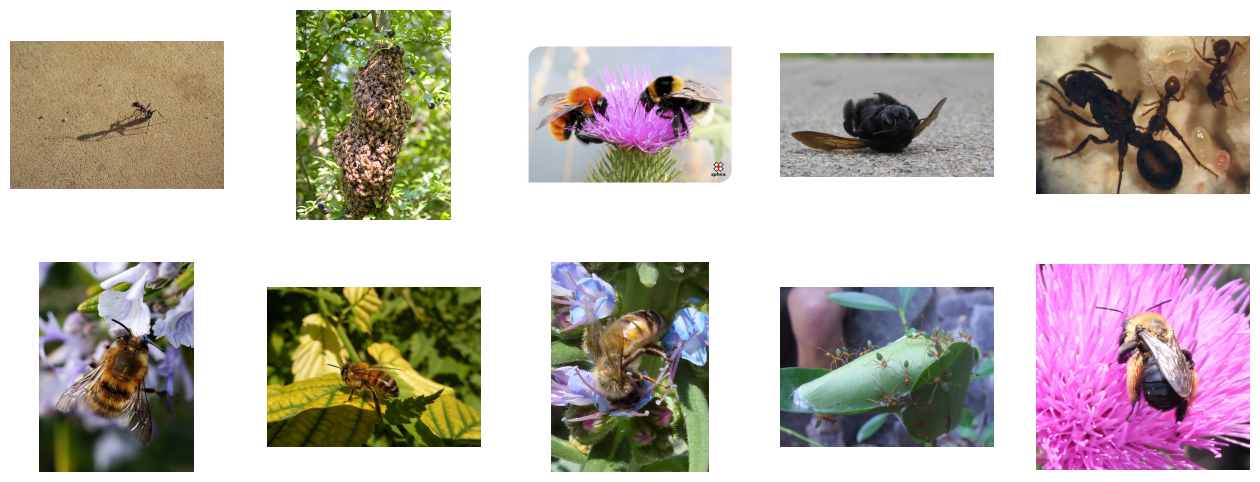

In [7]:
import matplotlib.image as mpimg

# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

Since we have very little training data it makes sense to use some data augmentation for training.

<span style="color:blue">

**Exercise 1**: Change the transforms in the code below in order to add some data augmentation to the training data. See if you can do a random crop instead of always cropping in the middle, and add horizontal flips. Then recreate the datasets and dataloaders.
    
</span>

In [8]:
import random 

In [9]:
# CHANGE THE CODE BELOW

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomApply(
            torch.nn.ModuleList([
                transforms.RandomCrop(size=(int(input_size[0]/2),int(input_size[1]/2))), #random crop
                transforms.RandomRotation(degrees=(0,360)), #random rotation
                ])
            , p=0.3),
        transforms.Resize(input_size), #reshape but mantain aspect
        transforms.CenterCrop(input_size), #ensure size
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

Initializing Datasets and Dataloaders...
Done


## Define the training function

The `train_model` function handles the training and validation of a given model. As input, it takes a PyTorch model, a dictionary of dataloaders, a loss function, an optimizer, and a specified number of epochs to train and validate for.

Instead of defining different functions for tranining and validation, we have combined everything into a single one below.

Note that we also have implemented early stopping - we keep track of the performance of our model on the validation set, and we keep a copy of the best model found using Python's `copy.deepcopy()` function. After training finishes, we copy the best weights from the saved model.

In [10]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    # we will keep a copy of the best weights so far according to validation accuracy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    losses[phase].append(loss.item())

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().numpy()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses

## Initialize the ResNet model

We will use the Resnet18 model (the smaller one), as our dataset is small and only has two classes. When we print the model, we see that the last layer is a fully connected layer as shown below:


   `(fc): Linear(in_features=512, out_features=1000, bias=True)`



In [11]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model():
    # Resnet18  
    model = models.resnet18()
    
    input_size = 224

    return model, input_size



# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="color:blue">

**Exercise 2**: Modify the function `initialize_model` so that it takes the number of classes `num_classes` as an argument, and it reinitializes `model.fc` to be a Linear layer with 512 input features and `num_classes` output features. Then use the function to create a model with 2 output classes.

</span>

In [12]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model():
    # Resnet18  
    model = models.resnet18()
    #modify last layer
    model.fc = nn.Linear(in_features=512,out_features=2)
    input_size = 224

    return model, input_size



# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Run Training and Validation Step

Let's start by training the model from scratch. What do you think will happen?


In [13]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
model, hist, losses = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.9677 Acc: 0.5369
val Loss: 1.6320 Acc: 0.4641

Epoch 1/14
----------
train Loss: 0.7255 Acc: 0.6148
val Loss: 0.6479 Acc: 0.6471

Epoch 2/14
----------
train Loss: 0.7052 Acc: 0.6025
val Loss: 0.6136 Acc: 0.6732

Epoch 3/14
----------
train Loss: 0.6914 Acc: 0.5369
val Loss: 0.7000 Acc: 0.5621

Epoch 4/14
----------
train Loss: 0.6438 Acc: 0.6270
val Loss: 0.7084 Acc: 0.5817

Epoch 5/14
----------
train Loss: 0.6608 Acc: 0.6270
val Loss: 0.6006 Acc: 0.6732

Epoch 6/14
----------
train Loss: 0.6568 Acc: 0.5984
val Loss: 0.6425 Acc: 0.6601

Epoch 7/14
----------
train Loss: 0.7021 Acc: 0.5861
val Loss: 0.6602 Acc: 0.6209

Epoch 8/14
----------
train Loss: 0.6317 Acc: 0.6557
val Loss: 0.6063 Acc: 0.7190

Epoch 9/14
----------
train Loss: 0.6341 Acc: 0.6803
val Loss: 0.6654 Acc: 0.6013

Epoch 10/14
----------
train Loss: 0.6439 Acc: 0.6557
val Loss: 0.7609 Acc: 0.5948

Epoch 11/14
----------
train Loss: 0.6537 Acc: 0.6762
val Loss: 0.9131 Acc: 0.6144

Ep

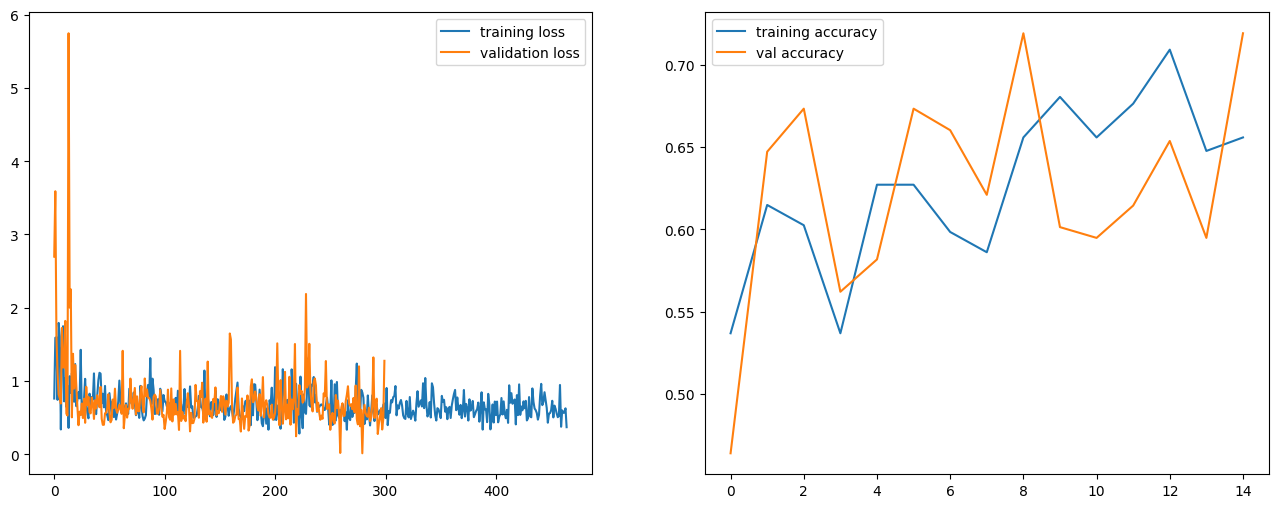

In [20]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses["train"], label="training loss")
ax1.plot(losses["val"], label="validation loss")
ax1.legend()

ax2.plot(hist["train"],label="training accuracy")
ax2.plot(hist["val"],label="val accuracy")
ax2.legend()

plt.show()   

Training from scratch with only 100 examples per class does not allow the network to perform very well in this task. It reaches at most 70% accuracy, and the loss seems not to descrease anymore.

## Preparing the model for finetuning and feature extraction

In order to finetune a model or use it for feature extraction, we need to first load the pretrained weights, and then to freeze the part of the model we do not want to change.

In order to load the pretrained weights for the ResNet model we must change a bit more the function `initialize model`. One one hand, we need to load the weights of the pre-trained ResNet model, trained on ImageNet.

Moreover, depending on whether we want to do finetuning (update all parameters of the model) or if we want to do feature extraction (update only the last fully connected layer), we must specify which parameter to update.

The following function sets the `.requires_grad` attribute of all the parameters in the model to False. This way we are freezing the model, since the parameters with `.requires_grad=False` will not be updated during training.


In [14]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

<span style="color:blue">

**Exercise 3**: Modify the function `initialize_model` so that it takes an extra argument called `finetuning`. If this function is True, then all parameters of the model should be able to update. If it is false, this would mean that we want to do feature extraction, and all parameters of the model should be frozen except the last fully connected layer.
    
In addition, look up the documentation of [`models.resnet18()`](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) and initialise the models with the `DEFAULT` weights.

Then create again your model, 
    
</span>

In [15]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model(finetuning):
    # Resnet18  
    model = models.resnet18(weights="DEFAULT")

    if finetuning == False:
        #freeze whole model
        freeze_model(model)

    #modify last layer and init with requires grad true default
    model.fc = nn.Linear(in_features=512,out_features=2)
    input_size = 224

    return model, input_size


# Initialize the model
model_ft, input_size = initialize_model(False)

# Print the model we just instantiated
print(model_ft)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 198MB/s]ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_

### Create the Optimizer

The final step for finetuning and feature extracting is to create an optimizer that **only** updates the desired parameters. Recall that after loading the pretrained model, if `finetuning == False` (we want to do feature extraction instead) we manually set all of the parameters' `.requires_grad` attributes to False. But the parameters of the reinitialized layer that we add afterwards have `.requires_grad=True` by default. So *all parameters that have `.requires_grad=True` should be optimized*. Next, we make a list of such parameters and input this list to the Adam algorithm constructor.

In [18]:
# Gather the parameters to be optimized/updated in this run. If we are finetuning we will be updating all parameters. However, if we are 
# doing feature extract method, we will only update the parameters that we have just initialized, i.e. the parameters with requires_grad is True.

params_to_update = []
for name, param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

print(params_to_update)

# Now give our optimiser the list of all the parameters that need to be optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

[Parameter containing:
tensor([[ 0.0020, -0.0206, -0.0182,  ..., -0.0052, -0.0235, -0.0402],
        [ 0.0153,  0.0226,  0.0352,  ...,  0.0345,  0.0189,  0.0236]],
       requires_grad=True), Parameter containing:
tensor([0.0238, 0.0181], requires_grad=True)]


<br>
<span style="color:blue">

**Exercise 4**: Train the model with feature extraction for 15 epochs. This is, you must freeze all parameters except the last fully connected layer. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [19]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

# Train and evaluate
model_ft, hist_ft, losses_ft = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.6179 Acc: 0.6311
val Loss: 0.4323 Acc: 0.8170

Epoch 1/14
----------
train Loss: 0.5106 Acc: 0.7500
val Loss: 0.3346 Acc: 0.8954

Epoch 2/14
----------
train Loss: 0.3882 Acc: 0.8402
val Loss: 0.2839 Acc: 0.9020

Epoch 3/14
----------
train Loss: 0.3756 Acc: 0.8320
val Loss: 0.3113 Acc: 0.8627

Epoch 4/14
----------
train Loss: 0.3153 Acc: 0.8443
val Loss: 0.2335 Acc: 0.9150

Epoch 5/14
----------
train Loss: 0.3869 Acc: 0.8197
val Loss: 0.2382 Acc: 0.9085

Epoch 6/14
----------
train Loss: 0.3401 Acc: 0.8525
val Loss: 0.2174 Acc: 0.9150

Epoch 7/14
----------
train Loss: 0.3278 Acc: 0.8525
val Loss: 0.2387 Acc: 0.8954

Epoch 8/14
----------
train Loss: 0.3555 Acc: 0.8197
val Loss: 0.2157 Acc: 0.9020

Epoch 9/14
----------
train Loss: 0.2919 Acc: 0.8689
val Loss: 0.2144 Acc: 0.9020

Epoch 10/14
----------
train Loss: 0.3350 Acc: 0.8566
val Loss: 0.2343 Acc: 0.9020

Epoch 11/14
----------
train Loss: 0.3368 Acc: 0.8525
val Loss: 0.2745 Acc: 0.8824

Ep

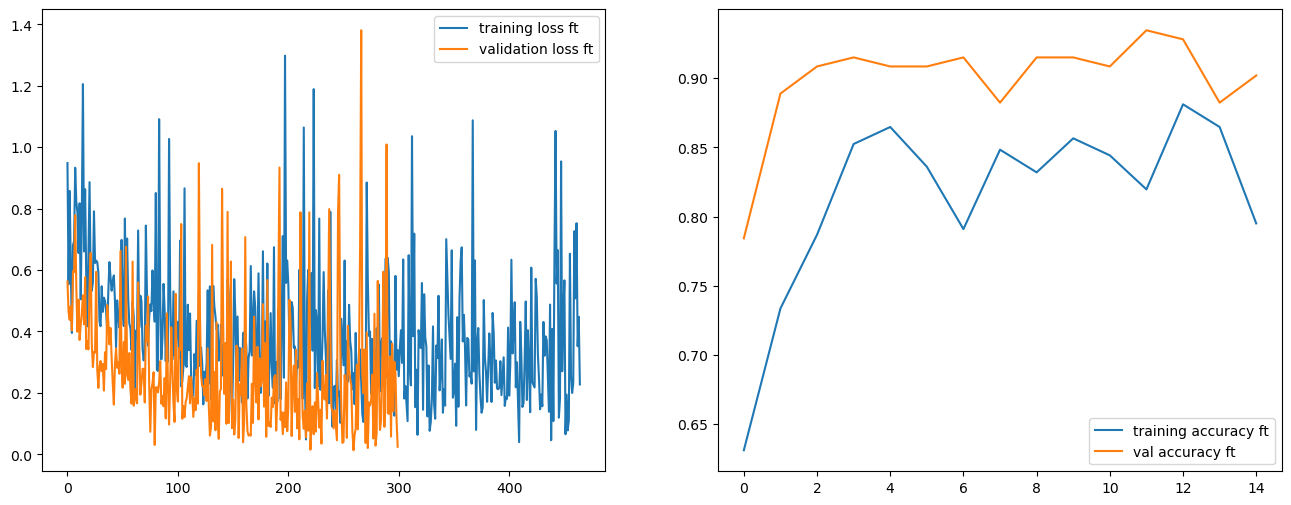

In [16]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_ft["train"], label="training loss ft")
ax1.plot(losses_ft["val"], label="validation loss ft")
ax1.legend()

ax2.plot(hist_ft["train"],label="training accuracy ft")
ax2.plot(hist_ft["val"],label="val accuracy ft")
ax2.legend()

plt.show()   

<br>
<span style="color:blue">

**Exercise 5**: Now train the model finetuning all the parameters for 15 epochs. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [22]:
# Initialize the model
model_ft2, input_size = initialize_model(True)

# Print the model we just instantiated
print(model_ft2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
# Gather the parameters to be optimized/updated in this run. If we are finetuning we will be updating all parameters. However, if we are 
# doing feature extract method, we will only update the parameters that we have just initialized, i.e. the parameters with requires_grad is True.

params_to_update = []
for name, param in model_ft2.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

print(params_to_update)

# Now give our optimiser the list of all the parameters that need to be optimized
optimizer_ft2 = optim.Adam(params_to_update, lr=0.001)

, -0.3232, -0.3337, -0.1901, -0.0692, -0.2196,
        -0.2132, -0.2565, -0.1646, -0.1567, -0.2087, -0.2178, -0.2480, -0.2767,
        -0.3071, -0.1988, -0.1985, -0.0235, -0.2458, -0.4156, -0.1660, -0.1923,
        -0.3328, -0.1481, -0.3047, -0.2277, -0.3182, -0.2744, -0.1643, -0.3365,
        -0.4050, -0.2082, -0.0621, -0.2671, -0.2809, -0.2185, -0.2148, -0.4465,
        -0.3376, -0.3213, -0.2921, -0.1998, -0.3369, -0.2092, -0.2831, -0.2893,
        -0.1719, -0.2189, -0.4016, -0.2484, -0.2070, -0.3849, -0.3753, -0.5874,
        -0.1637, -0.1748, -0.2217, -0.5067, -0.2496, -0.2117, -0.4291, -0.1944,
        -0.3089, -0.2621, -0.4096, -0.0602, -0.2009, -0.1316, -0.3336, -0.2627,
        -0.2320, -0.0910, -0.1560, -0.2889, -0.3286, -0.1628, -0.5128, -0.2036,
        -0.1726, -0.1844, -0.2285, -0.1925, -0.3432, -0.0929, -0.3138, -0.1912,
        -0.1926, -0.0342, -0.3268, -0.1699, -0.0828, -0.2417, -0.2069, -0.3870,
        -0.2210, -0.2867, -0.0526, -0.3092, -0.0655, -0.2594, -0.2160, -0

In [24]:
# Send the model to GPU
model_ft2 = model_ft2.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

# Train and evaluate
model_ft2, hist_ft2, losses_ft2 = train_model(model_ft2, dataloaders_dict, criterion, optimizer_ft2, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 1.0324 Acc: 0.5902
val Loss: 0.9593 Acc: 0.6209

Epoch 1/14
----------
train Loss: 0.7001 Acc: 0.5820
val Loss: 0.6193 Acc: 0.6797

Epoch 2/14
----------
train Loss: 0.6742 Acc: 0.5984
val Loss: 0.7550 Acc: 0.6993

Epoch 3/14
----------
train Loss: 0.6849 Acc: 0.5943
val Loss: 2.9584 Acc: 0.5621

Epoch 4/14
----------
train Loss: 0.7002 Acc: 0.5533
val Loss: 0.7350 Acc: 0.5948

Epoch 5/14
----------
train Loss: 0.6547 Acc: 0.6516
val Loss: 0.8376 Acc: 0.6144

Epoch 6/14
----------
train Loss: 0.6861 Acc: 0.6189
val Loss: 0.6390 Acc: 0.7320

Epoch 7/14
----------
train Loss: 0.6827 Acc: 0.5820
val Loss: 0.8121 Acc: 0.6209

Epoch 8/14
----------
train Loss: 0.5982 Acc: 0.7131
val Loss: 0.6214 Acc: 0.6405

Epoch 9/14
----------
train Loss: 0.6004 Acc: 0.6844
val Loss: 0.6670 Acc: 0.7516

Epoch 10/14
----------
train Loss: 0.6206 Acc: 0.6967
val Loss: 0.5683 Acc: 0.7190

Epoch 11/14
----------
train Loss: 0.6948 Acc: 0.6393
val Loss: 0.7940 Acc: 0.7255

Ep

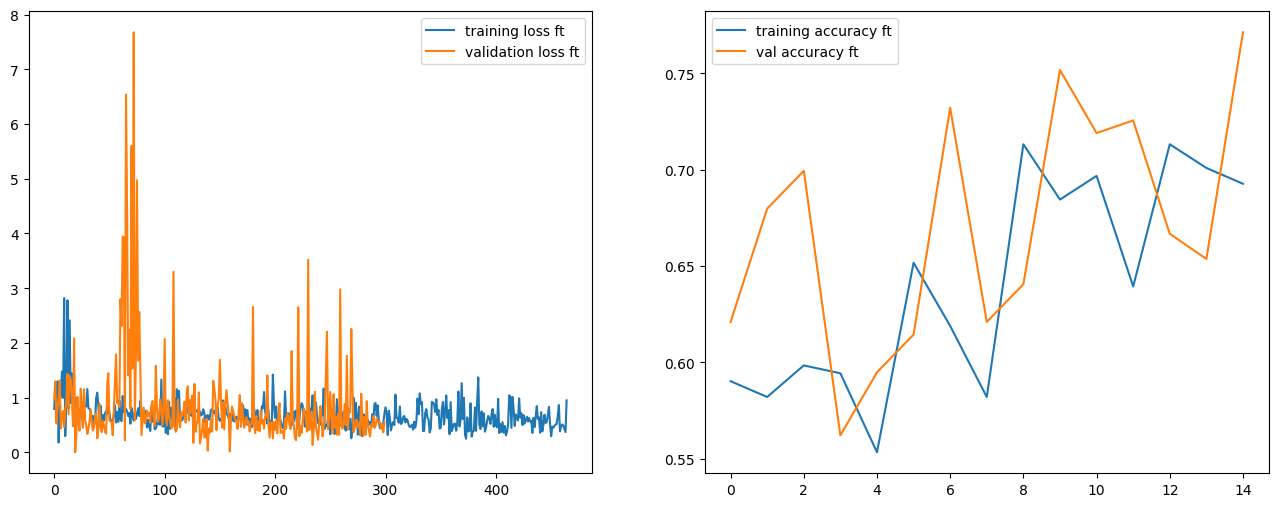

In [25]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses_ft2["train"], label="training loss ft")
ax1.plot(losses_ft2["val"], label="validation loss ft")
ax1.legend()

ax2.plot(hist_ft2["train"],label="training accuracy ft")
ax2.plot(hist_ft2["val"],label="val accuracy ft")
ax2.legend()

plt.show()   

<br>
<span style="color:blue">

**Exercise 6**: Plot the  train/val losses and accuracies of all three approaches: training from scratch, finetunning, and festure extraction. To make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

Make the plot self-explanatory: use legends and titles for each subplot, and a main title for the whole figure.

</span>

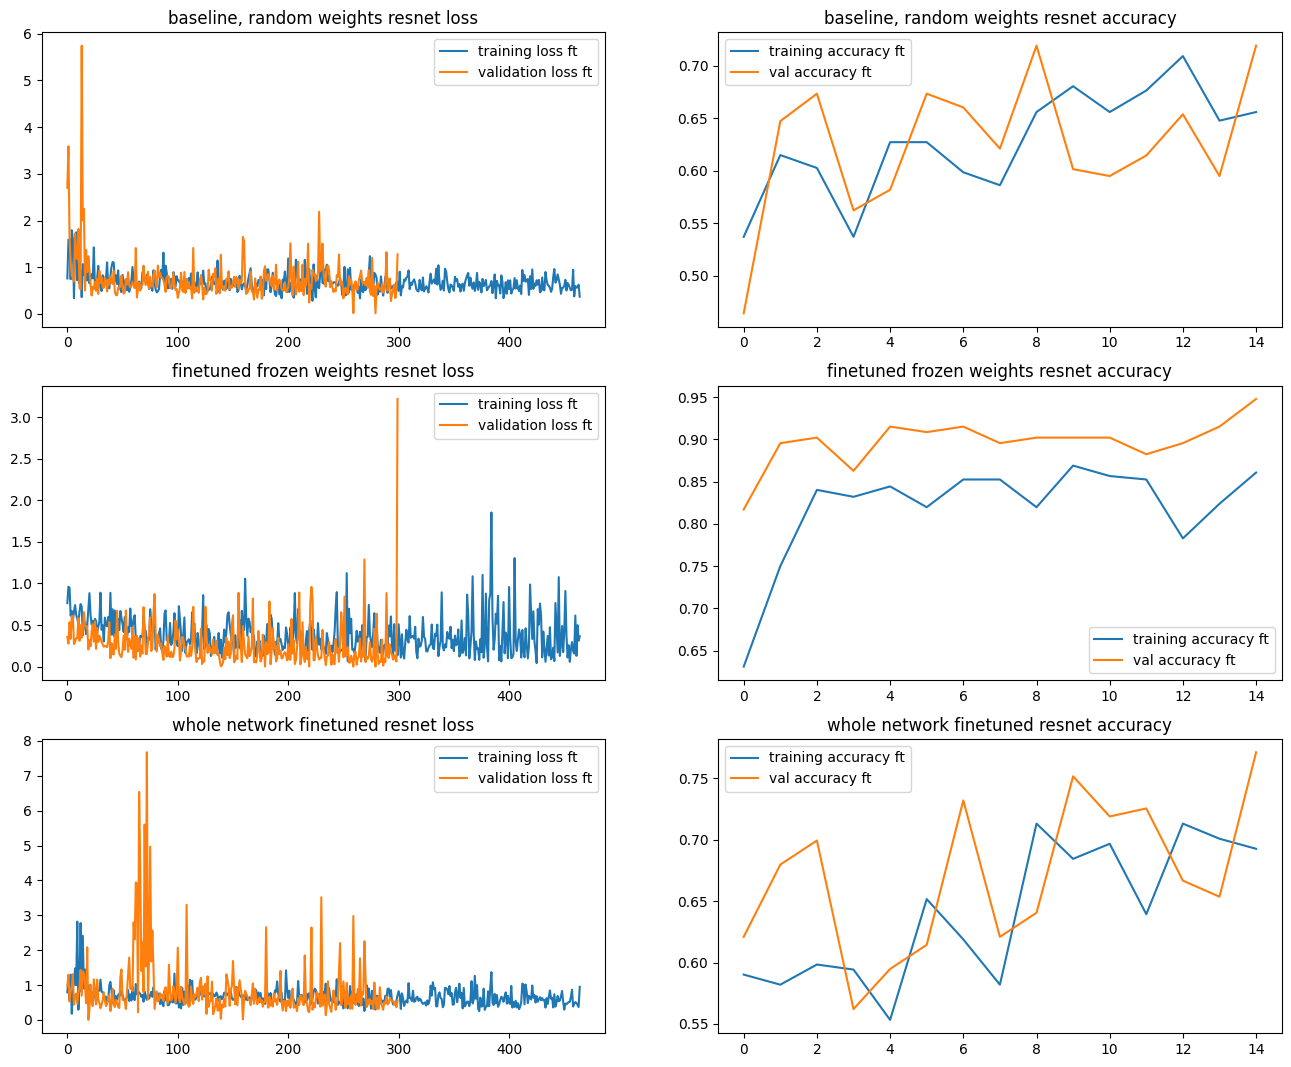

In [26]:
# plot the losses and accuracies

fig1, ((ax1_1, ax2_1),(ax1_2, ax2_2),(ax1_3, ax2_3)) = plt.subplots(3, 2, figsize=(16, 13))

ax1_1.plot(losses["train"], label="training loss ft")
ax1_1.plot(losses["val"], label="validation loss ft")
ax1_1.legend()
ax1_1.title.set_text("baseline, random weights resnet loss")

ax2_1.plot(hist["train"],label="training accuracy ft")
ax2_1.plot(hist["val"],label="val accuracy ft")
ax2_1.legend()
ax2_1.title.set_text("baseline, random weights resnet accuracy")

# plot the losses and accuracies
#fig2, (ax1_2, ax2_2) = plt.subplots(1, 2, figsize=(16, 6))

ax1_2.plot(losses_ft["train"], label="training loss ft")
ax1_2.plot(losses_ft["val"], label="validation loss ft")
ax1_2.legend()
ax1_2.title.set_text("finetuned frozen weights resnet loss")

ax2_2.plot(hist_ft["train"],label="training accuracy ft")
ax2_2.plot(hist_ft["val"],label="val accuracy ft")
ax2_2.legend()
ax2_2.title.set_text("finetuned frozen weights resnet accuracy")

# plot the losses and accuracies
#fig3, (ax1_3, ax2_3) = plt.subplots(1, 2, figsize=(16, 6))

ax1_3.plot(losses_ft2["train"], label="training loss ft")
ax1_3.plot(losses_ft2["val"], label="validation loss ft")
ax1_3.legend()
ax1_3.title.set_text("whole network finetuned resnet loss")

ax2_3.plot(hist_ft2["train"],label="training accuracy ft")
ax2_3.plot(hist_ft2["val"],label="val accuracy ft")
ax2_3.legend()
ax2_3.title.set_text("whole network finetuned resnet accuracy")

plt.show()

<br>
<span style="color:blue">

**Exercise 7**: Train the ResNet-18 model for a different dataset (MIT Scenes) using the three training strategies: from scratch (do not load pre-trained weights), finetunning, and feature extraction. Train the model **for 40 epochs** - each training process should take approx. 10 minutes on colab.
    
The URL of the dataset is the following (you also have the file on Campus Virtual):
    
http://wwwo.cvc.uab.es/people/dimos/downloads/MIT_scenes.zip

The dataset contains scene images of **8 classes**: coast, forest, highway, inside_city, mountain, open_country, street, and tallbuilding. The number of training images per class varies between 187 and 295. 

Train the three models and plot the  train/val losses and accuracies of all of them. Again, to make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.
    
</span>

dataset load

In [34]:
# download the dataset
url = 'http://wwwo.cvc.uab.es/people/dimos/downloads/MIT_scenes.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/MIT_scenes/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")


Using downloaded and verified file: ./data/MIT_scenes.zip
Extracting ./data/MIT_scenes.zip to ./data
Initializing Datasets and Dataloaders...
Done


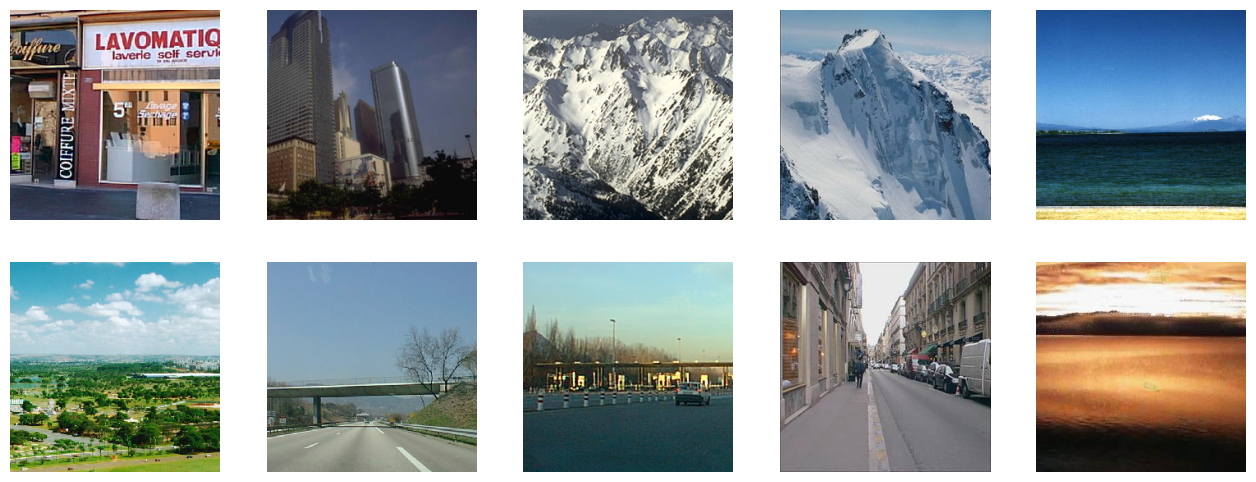

In [35]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

In [36]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model(pretrained,finetuning):
    # Resnet18  
    if pretrained == True:
        model = models.resnet18(weights="DEFAULT")
    else:
         model = models.resnet18()

    if finetuning == False:
        #freeze whole model
        freeze_model(model)

    #modify last layer and init with requires grad true default
    model.fc = nn.Linear(in_features=512,out_features=8)
    input_size = 224

    return model, input_size

Baseline no pretrained weights approach:

In [37]:
# Initialize the model
model, input_size = initialize_model(pretrained=False,finetuning=True)

# Print the model we just instantiated
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
model, hist, losses = train_model(model, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 1.7332 Acc: 0.3759
val Loss: 1.3930 Acc: 0.4709

Epoch 1/14
----------
train Loss: 1.3128 Acc: 0.5263
val Loss: 1.1025 Acc: 0.5973

Epoch 2/14
----------
train Loss: 1.0997 Acc: 0.5976
val Loss: 0.9846 Acc: 0.6629

Epoch 3/14
----------
train Loss: 0.9596 Acc: 0.6640
val Loss: 0.8972 Acc: 0.7014

Epoch 4/14
----------
train Loss: 0.8267 Acc: 0.7241
val Loss: 0.9765 Acc: 0.6642

Epoch 5/14
----------
train Loss: 0.7563 Acc: 0.7326
val Loss: 0.7208 Acc: 0.7447

Epoch 6/14
----------
train Loss: 0.7001 Acc: 0.7539
val Loss: 0.7106 Acc: 0.7546

Epoch 7/14
----------
train Loss: 0.6423 Acc: 0.7767
val Loss: 0.5779 Acc: 0.8017

Epoch 8/14
----------
train Loss: 0.5794 Acc: 0.8054
val Loss: 0.5682 Acc: 0.7980

Epoch 9/14
----------
train Loss: 0.5986 Acc: 0.7996
val Loss: 0.6335 Acc: 0.7955

Epoch 10/14
----------
train Loss: 0.4695 Acc: 0.8304
val Loss: 0.7058 Acc: 0.7546

Epoch 11/14
----------
train Loss: 0.4144 Acc: 0.8506
val Loss: 0.5561 Acc: 0.8079

Ep

finetuning with pretrained weights

In [39]:
# Initialize the model
model_ft, input_size = initialize_model(pretrained=True,finetuning=True)

# Print the model we just instantiated
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [40]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

params_to_update = []
for name, param in model_ft.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer_ft = optim.Adam(params_to_update, lr=0.001)

# Train and evaluate
model_ft, hist_ft, losses_ft = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 1.0879 Acc: 0.6374
val Loss: 0.6971 Acc: 0.7782

Epoch 1/14
----------
train Loss: 0.7389 Acc: 0.7539
val Loss: 0.5425 Acc: 0.8079

Epoch 2/14
----------
train Loss: 0.6174 Acc: 0.7868
val Loss: 0.5149 Acc: 0.8290

Epoch 3/14
----------
train Loss: 0.5004 Acc: 0.8293
val Loss: 0.3448 Acc: 0.8860

Epoch 4/14
----------
train Loss: 0.4291 Acc: 0.8501
val Loss: 0.3684 Acc: 0.8748

Epoch 5/14
----------
train Loss: 0.3923 Acc: 0.8692
val Loss: 0.3579 Acc: 0.8872

Epoch 6/14
----------
train Loss: 0.3964 Acc: 0.8612
val Loss: 0.3410 Acc: 0.8810

Epoch 7/14
----------
train Loss: 0.2675 Acc: 0.9123
val Loss: 0.4659 Acc: 0.8612

Epoch 8/14
----------
train Loss: 0.3463 Acc: 0.8937
val Loss: 0.5932 Acc: 0.8042

Epoch 9/14
----------
train Loss: 0.2158 Acc: 0.9266
val Loss: 0.2381 Acc: 0.9195

Epoch 10/14
----------
train Loss: 0.2133 Acc: 0.9330
val Loss: 0.3034 Acc: 0.8984

Epoch 11/14
----------
train Loss: 0.1756 Acc: 0.9426
val Loss: 0.3311 Acc: 0.8848

Ep

feature extraction 

In [41]:
# Initialize the model
model_ft2, input_size = initialize_model(pretrained=True,finetuning=False)

# Print the model we just instantiated
print(model_ft2)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
# Send the model to GPU
model_ft2 = model_ft.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

params_to_update = []
for name, param in model_ft2.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        
optimizer_ft2 = optim.Adam(params_to_update, lr=0.001)

# Train and evaluate
model_ft2, hist_ft2, losses_ft2 = train_model(model_ft2, dataloaders_dict, criterion, optimizer_ft2, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.2106 Acc: 0.9320
val Loss: 0.3086 Acc: 0.9083

Epoch 1/14
----------
train Loss: 0.1689 Acc: 0.9426
val Loss: 0.5846 Acc: 0.8600

Epoch 2/14
----------
train Loss: 0.1802 Acc: 0.9389
val Loss: 0.4176 Acc: 0.8971

Epoch 3/14
----------
train Loss: 0.1349 Acc: 0.9543
val Loss: 0.4986 Acc: 0.8711

Epoch 4/14
----------
train Loss: 0.1536 Acc: 0.9537
val Loss: 0.4047 Acc: 0.8699

Epoch 5/14
----------
train Loss: 0.1509 Acc: 0.9426
val Loss: 0.3457 Acc: 0.8934

Epoch 6/14
----------
train Loss: 0.1388 Acc: 0.9585
val Loss: 0.2736 Acc: 0.9145

Epoch 7/14
----------
train Loss: 0.0863 Acc: 0.9734
val Loss: 0.4372 Acc: 0.8810

Epoch 8/14
----------
train Loss: 0.0760 Acc: 0.9729
val Loss: 0.4506 Acc: 0.8885

Epoch 9/14
----------
train Loss: 0.0976 Acc: 0.9718
val Loss: 0.3929 Acc: 0.8996

Epoch 10/14
----------
train Loss: 0.0960 Acc: 0.9692
val Loss: 0.3996 Acc: 0.9095

Epoch 11/14
----------
train Loss: 0.0979 Acc: 0.9660
val Loss: 0.4338 Acc: 0.9046

Ep

Visualization

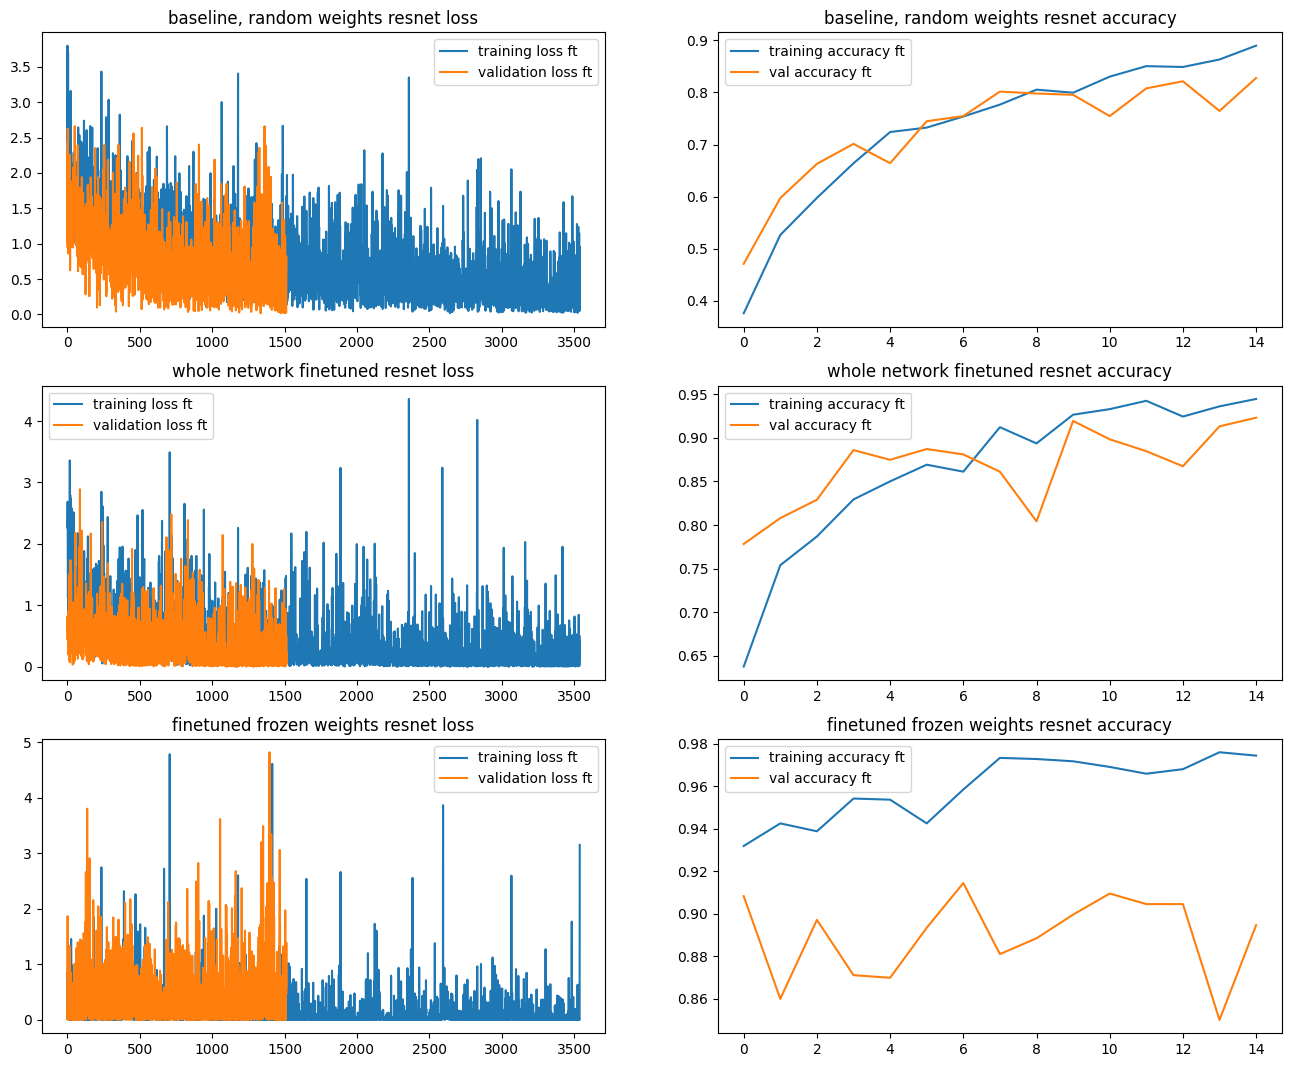

In [43]:
# plot the losses and accuracies

fig1, ((ax1_1, ax2_1),(ax1_2, ax2_2),(ax1_3, ax2_3)) = plt.subplots(3, 2, figsize=(16, 13))

ax1_1.plot(losses["train"], label="training loss ft")
ax1_1.plot(losses["val"], label="validation loss ft")
ax1_1.legend()
ax1_1.title.set_text("baseline, random weights resnet loss")

ax2_1.plot(hist["train"],label="training accuracy ft")
ax2_1.plot(hist["val"],label="val accuracy ft")
ax2_1.legend()
ax2_1.title.set_text("baseline, random weights resnet accuracy")

# plot the losses and accuracies
#fig2, (ax1_2, ax2_2) = plt.subplots(1, 2, figsize=(16, 6))

ax1_2.plot(losses_ft["train"], label="training loss ft")
ax1_2.plot(losses_ft["val"], label="validation loss ft")
ax1_2.legend()
ax1_2.title.set_text("whole network finetuned resnet loss")

ax2_2.plot(hist_ft["train"],label="training accuracy ft")
ax2_2.plot(hist_ft["val"],label="val accuracy ft")
ax2_2.legend()
ax2_2.title.set_text("whole network finetuned resnet accuracy")

# plot the losses and accuracies
#fig3, (ax1_3, ax2_3) = plt.subplots(1, 2, figsize=(16, 6))

ax1_3.plot(losses_ft2["train"], label="training loss ft")
ax1_3.plot(losses_ft2["val"], label="validation loss ft")
ax1_3.legend()
ax1_3.title.set_text("finetuned frozen weights resnet loss")

ax2_3.plot(hist_ft2["train"],label="training accuracy ft")
ax2_3.plot(hist_ft2["val"],label="val accuracy ft")
ax2_3.legend()
ax2_3.title.set_text("finetuned frozen weights resnet accuracy")

plt.show()

<br>
<span style="color:blue">

**Exercise 7**: Visualize some of the images along with the classification results of your best model.
    
*Hints: (1) The images that the dataloader gives you are already normalised, you need to "de-normalise" them if you want to see the true colours. (2) The order of dimensions of PyTorch is C, H, W, if you want to plot images you need your arrays ordered as H, W, C.*
    
</span>

Correctly predicted: 75.0%


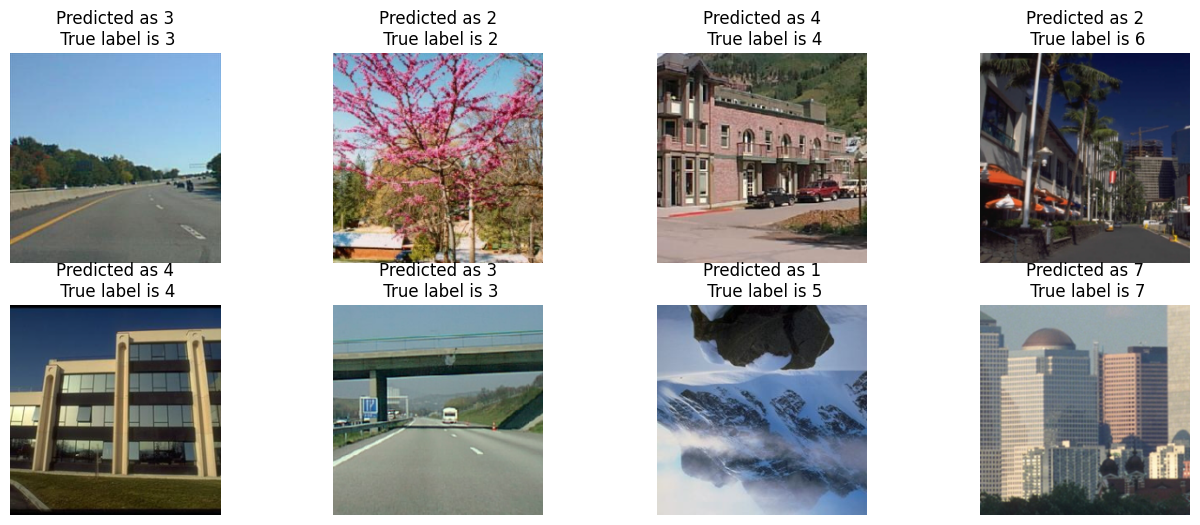

In [45]:
#I am already late delivering this notebook, copied this cell from the solutions.
with torch.no_grad():

    data, target = next(iter(dataloaders_dict["val"]))
    data, target = data.to(device), target.to(device)

    output = model_ft2(data)
    predictions = np.argmax(output.cpu().numpy(), axis=1).tolist()
    true = target.cpu().numpy().tolist()
      
    plt.figure(figsize=(16, 6))
    
    print("Correctly predicted: {}%".format(100*sum(p == t for p, t in zip(predictions, true))/len(predictions)) )

    for i in range(8):
        plt.subplot(2, 4, i + 1)
        
        image = data[i,...].cpu().clone().detach() # Create a copy of the tensor in the CPU
        image = image.permute(1, 2, 0) # The original tensor is formatted as Channels, Height, Width - move channels to the end
        image = image.numpy()

        # Undo the normalisation we applied before
        image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        image = image.clip(0, 1)

        plt.imshow(image)
        
        plt.axis('off')
        plt.title('Predicted as {}\n True label is {}'.format(predictions[i], true[i], ))